In [9]:
# 1. Importando bibliotecas e dados

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregar dados
df = pd.read_csv('data/staging_data.csv')

# 3. Remover colunas irrelevantes
df = df.drop(columns=['id', 'age'])

# Visualizar as 5 primeiras linhas
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,masculino,168,62.0,110,80,normal,normal,0,0,1,0,50
1,feminino,156,85.0,140,90,muito_alto,normal,0,0,1,1,55
2,feminino,165,64.0,130,70,muito_alto,normal,0,0,0,1,51
3,masculino,169,82.0,150,100,normal,normal,0,0,1,1,48
4,feminino,156,56.0,100,60,normal,normal,0,0,0,0,47


In [21]:
# 2. Separar variáveis preditoras e alvo

X = df.drop(columns=['cardio'])  
y = df['cardio']

df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,masculino,168,62.0,110,80,normal,normal,0,0,1,0,50
1,feminino,156,85.0,140,90,muito_alto,normal,0,0,1,1,55
2,feminino,165,64.0,130,70,muito_alto,normal,0,0,0,1,51
3,masculino,169,82.0,150,100,normal,normal,0,0,1,1,48
4,feminino,156,56.0,100,60,normal,normal,0,0,0,0,47


# Regressão Logística

In [22]:
# Aplicar one-hot encoding em variáveis categóricas
X_encoded = pd.get_dummies(X, columns=['gender', 'cholesterol', 'gluc'], drop_first=True)

In [23]:
# 3. Dividir em treino e teste

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
model_lr = LogisticRegression(random_state=42, class_weight='balanced')
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [26]:
y_pred = model_lr.predict(X_test_scaled)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.7308834446919079
Matriz de Confusão:
 [[5286 1446]
 [2179 4559]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.71      0.79      0.74      6732
           1       0.76      0.68      0.72      6738

    accuracy                           0.73     13470
   macro avg       0.73      0.73      0.73     13470
weighted avg       0.73      0.73      0.73     13470



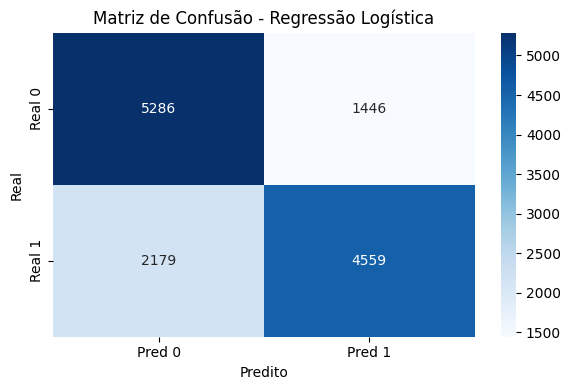

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Gerar matriz de confusão a partir das previsões
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Real 0', 'Real 1'])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística")
plt.tight_layout()
plt.show()

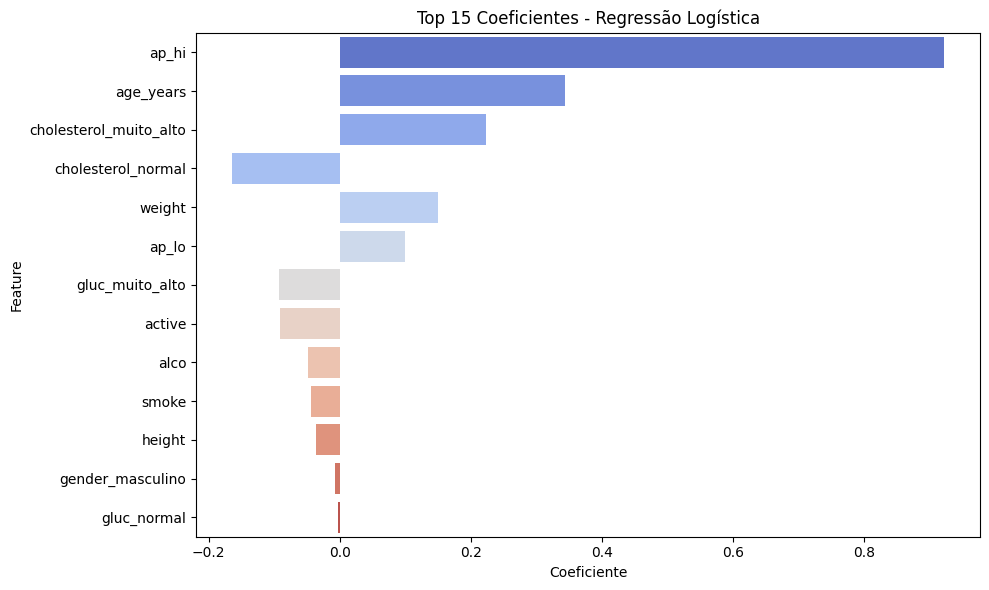

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criar DataFrame com coeficientes e nomes das variáveis
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coeficiente': model_lr.coef_[0]
})

# Ordenar por valor absoluto (importância real)
coef_df['Importância'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='Importância', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coeficiente',
    y='Feature',
    hue='Feature',
    data=coef_df.head(15),
    palette='coolwarm',
    legend=False
)
plt.title("Top 15 Coeficientes - Regressão Logística")
plt.tight_layout()
plt.show()

In [31]:
#7. Salvar o modelo treinado

import joblib

joblib.dump(model_lr, 'modelos/modelo_regressao_logistica.pkl')
joblib.dump(scaler, 'modelos/escalador.pkl')

['modelos/escalador.pkl']

# Randon Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
# 2. Treinar o Modelo

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train) 

RandomForestClassifier(random_state=42)

In [34]:
y_pred_rf = model_rf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))

Acurácia: 0.7043801039346697
Matriz de Confusão:
 [[4724 2008]
 [1974 4764]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.71      0.70      0.70      6732
           1       0.70      0.71      0.71      6738

    accuracy                           0.70     13470
   macro avg       0.70      0.70      0.70     13470
weighted avg       0.70      0.70      0.70     13470



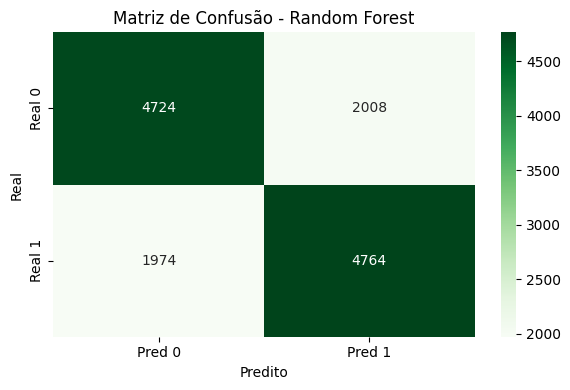

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Gerar matriz de confusão automaticamente
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotar a matriz
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Real 0', 'Real 1'])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.tight_layout()
plt.show()

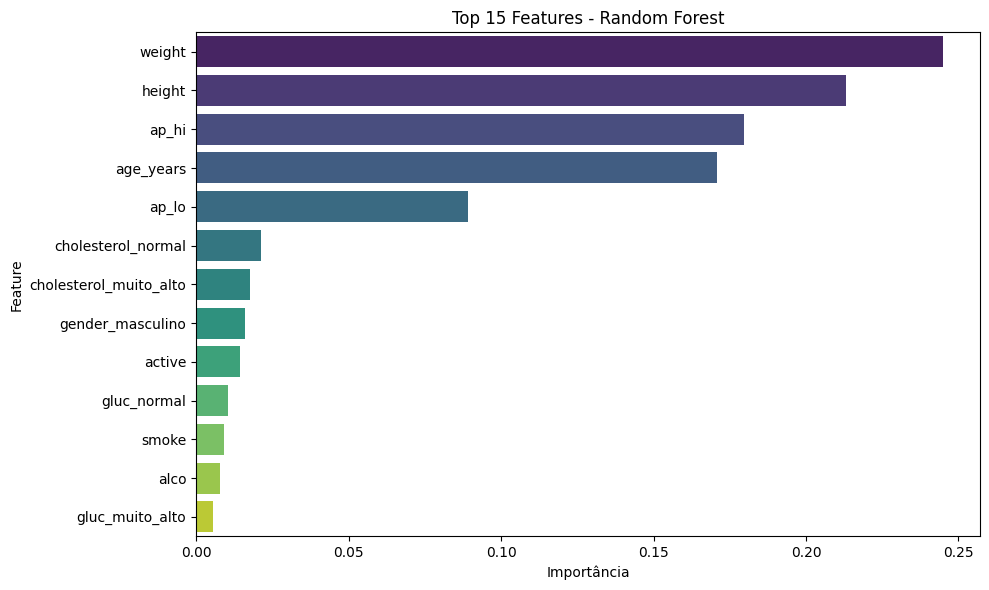

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obter importâncias diretamente do modelo
importances = model_rf.feature_importances_

# DataFrame ordenado
df_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importância': importances
}).sort_values(by='Importância', ascending=False)

# Visualizar as 15 mais importantes
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importância',
    y='Feature',
    hue='Feature',
    data=df_importance_rf.head(15),
    palette='viridis',
    legend=False
)
plt.title("Top 15 Features - Random Forest")
plt.tight_layout()
plt.show()

In [56]:
joblib.dump(model_rf, 'modelos/modelo_random_forest.pkl')

['modelos/modelo_random_forest.pkl']

# Support Vector Machine (SVM)

In [39]:
from sklearn.svm import SVC

In [40]:
# Rodar o Modelo
model_svm = SVC(kernel='rbf', class_weight='balanced', random_state=42)
model_svm.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', random_state=42)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_svm = model_svm.predict(X_test_scaled)

print("Acurácia:", accuracy_score(y_test, y_pred_svm))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_svm))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_svm))

Acurácia: 0.7354120267260579
Matriz de Confusão:
 [[5294 1438]
 [2126 4612]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      6732
           1       0.76      0.68      0.72      6738

    accuracy                           0.74     13470
   macro avg       0.74      0.74      0.73     13470
weighted avg       0.74      0.74      0.73     13470



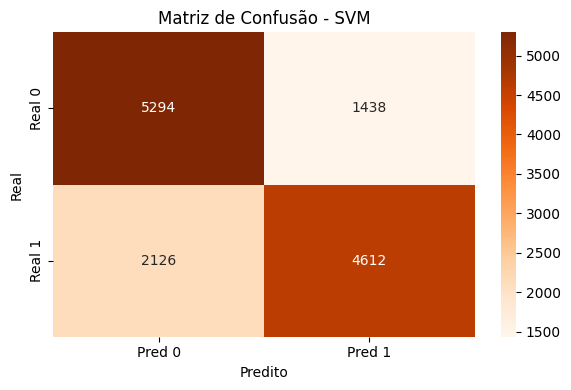

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Real 0', 'Real 1'])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - SVM")
plt.tight_layout()
plt.show()

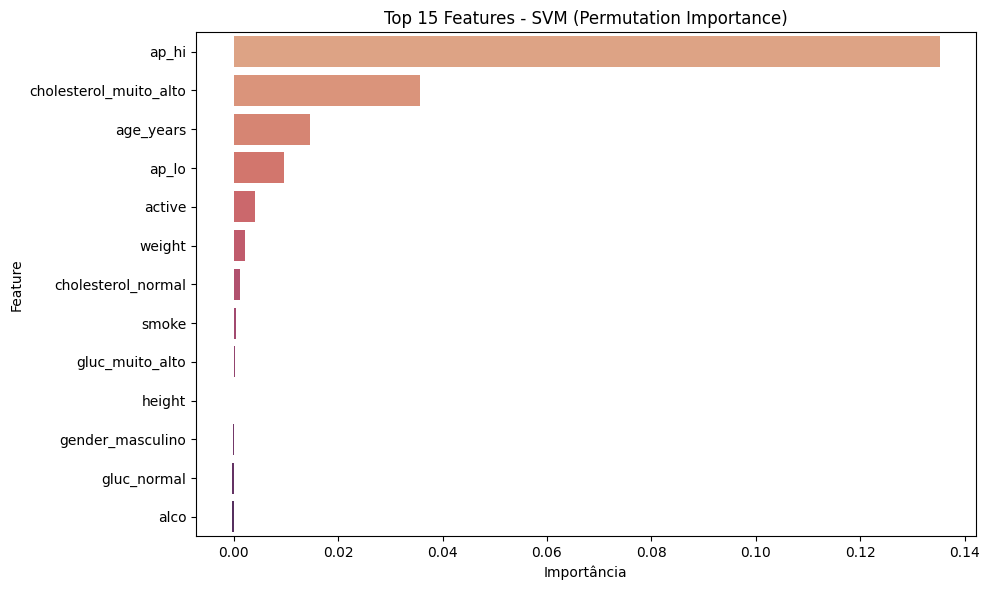

In [43]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model_svm, X_test_scaled, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Montar DataFrame com importâncias
df_perm_svm = pd.DataFrame({
    'Feature': X_train.columns,
    'Importância': result.importances_mean
}).sort_values(by='Importância', ascending=False)

# Exibir top 15
plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Feature', hue='Feature', data=df_perm_svm.head(15), palette='flare', legend=False)
plt.title("Top 15 Features - SVM (Permutation Importance)")
plt.tight_layout()
plt.show()


In [55]:
joblib.dump(model_svm, 'modelos/modelo_svm.pkl')

['modelos/modelo_svm.pkl']

# Comparação dos Modelos

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Previsões (caso ainda não tenha feito)
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_rf = model_rf.predict(X_test)
y_pred_svm = model_svm.predict(X_test_scaled)

# Construir dicionário dinamicamente
metrics = {
    'Modelo': ['Regressão Logística', 'Random Forest', 'SVM'],
    'Acurácia': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_svm)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_svm)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_svm)
    ]
}

import pandas as pd
df_metrics = pd.DataFrame(metrics)
df_metrics = df_metrics.round(3)  # arredondar para 3 casas

print(df_metrics)

                Modelo  Acurácia  Precision  Recall  F1-Score
0  Regressão Logística     0.731      0.759   0.677     0.716
1        Random Forest     0.704      0.703   0.707     0.705
2                  SVM     0.735      0.762   0.684     0.721


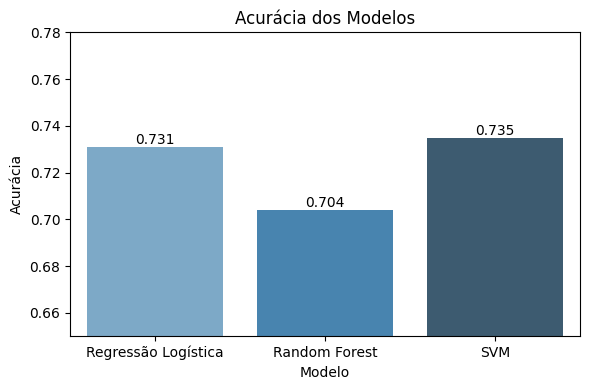

In [52]:
plt.figure(figsize=(6, 4))
bar = sns.barplot(x='Modelo', y='Acurácia', hue='Modelo', data=df_metrics, palette='Blues_d', legend=False)
plt.title("Acurácia dos Modelos")
plt.ylim(0.65, 0.78)
for container in bar.containers:
    bar.bar_label(container, fmt='%.3f', label_type='edge')
plt.tight_layout()
plt.show()

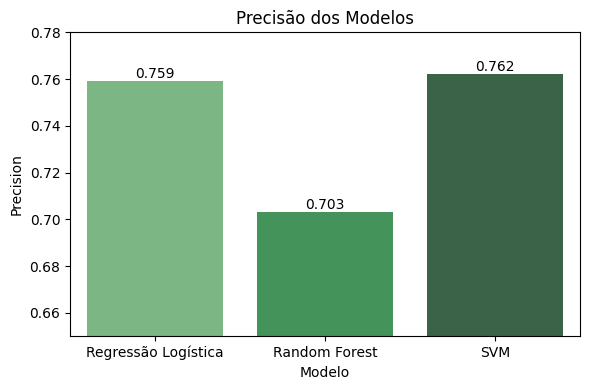

In [51]:
plt.figure(figsize=(6, 4))
bar = sns.barplot(
    x='Modelo',
    y='Precision',
    hue='Modelo',
    data=df_metrics,
    palette='Greens_d',
    legend=False
)
plt.title("Precisão dos Modelos")
plt.ylim(0.65, 0.78)

# Adiciona os valores em todas as barras (3 casas decimais)
for container in bar.containers:
    bar.bar_label(container, fmt='%.3f', label_type='edge')

plt.tight_layout()
plt.show()

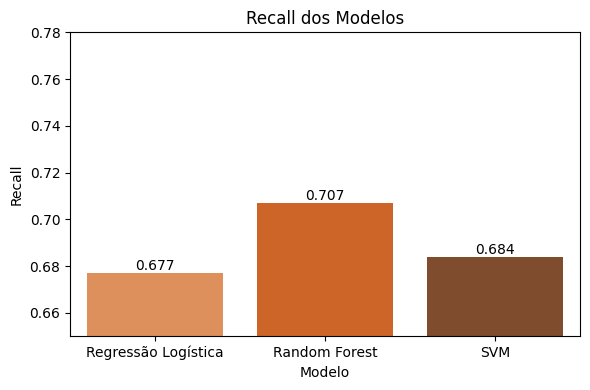

In [53]:
plt.figure(figsize=(6, 4))
bar = sns.barplot(x='Modelo', y='Recall', hue='Modelo', data=df_metrics, palette='Oranges_d', legend=False)
plt.title("Recall dos Modelos")
plt.ylim(0.65, 0.78)
for container in bar.containers:
    bar.bar_label(container, fmt='%.3f', label_type='edge')
plt.tight_layout()
plt.show()

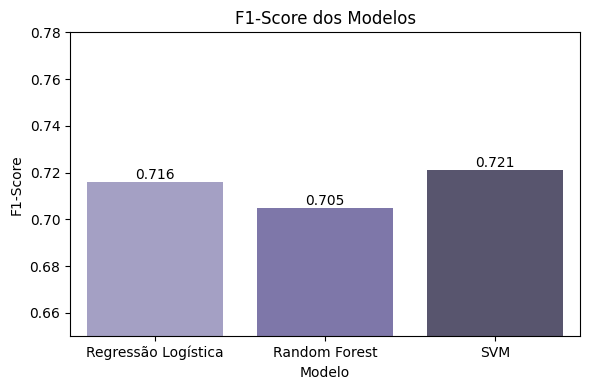

In [54]:
plt.figure(figsize=(6, 4))
bar = sns.barplot(x='Modelo', y='F1-Score', hue='Modelo', data=df_metrics, palette='Purples_d', legend=False)
plt.title("F1-Score dos Modelos")
plt.ylim(0.65, 0.78)
for container in bar.containers:
    bar.bar_label(container, fmt='%.3f', label_type='edge')
plt.tight_layout()
plt.show()